In [1]:
from beamtest_analysis_helper import plot_resolution_table, plot_resolution_with_pulls
from collections import defaultdict
import pandas as pd
import numpy as np

## Figure configs

In [2]:
board_to_analyze = [1,2,3]
fig_configs = {
    0: {
        'name': 'Barcelona 21',
        'short': 'BAR_21',
        'offset': 20,
        'HV': 200,
    },
    1: {
        'name': 'Barcelona 12',
        'short': 'BAR_12',
        'offset': 20,
        'HV': 120,
    },
    2: {
        'name': 'ET2.03 Pair 16',
        'short': 'PAIR_16',
        'offset': 20,
        'HV': 220,
    },
    3: {
        'name': 'Barcelona 20',
        'short': 'BAR_20',
        'offset': 20,
        'HV': 200,
    },
}

for id in board_to_analyze:
    fig_configs[id]['title'] = f"{fig_configs[id]['name']} HV{fig_configs[id]['HV']}V OS:{fig_configs[id]['offset']}"

In [139]:
## final_df: time resolution dataframe
final_df = pd.read_csv('../resolution_CERNSept2024_Run_28_TOA250to500.csv')

## nevt_track_df: number of events dataframe
nevt_track_df = pd.read_csv('../CERNSept2024_Run_28_nevt_per_track.csv')

In [140]:
final_df

,row0,col0,row1,col1,res1,err1,row2,col2,res2,err2,row3,col3,res3,err3
0,1,7,0,6,51.552769,3.312408,0,6,50.862159,2.481785,0,6,62.825210,2.636921
1,1,8,0,7,48.714034,3.412292,0,6,46.601787,2.976349,0,7,60.162193,2.398014
2,1,8,0,7,44.639973,3.247781,0,7,58.583179,2.557657,0,7,50.264168,3.339707
3,1,9,0,8,46.052602,3.768675,0,7,52.606718,3.234345,0,8,61.495307,2.276395
4,1,9,0,8,47.523556,2.842083,0,8,48.506139,1.969290,0,8,60.269422,2.025832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,15,15,14,14,52.544107,3.761309,13,14,42.580046,8.927442,13,14,73.432012,3.616315
1105,15,15,14,14,46.884705,1.539943,13,14,39.503712,1.933242,14,14,58.001906,1.190100
1106,15,15,14,14,42.584472,2.092953,14,13,50.955431,1.812064,14,14,54.482691,1.477115
1107,15,15,14,14,42.325390,2.848351,14,14,53.102511,1.950627,14,14,52.511597,2.724385


In [141]:
nevt_track_df

,row0,col0,row1,col1,row2,col2,row3,col3,nevt
0,11,14,10,13,10,13,10,13,5371
1,8,4,7,2,6,2,7,2,2840
2,5,14,4,13,3,12,4,13,43692
3,8,12,7,11,7,11,7,11,6262
4,11,14,10,13,10,12,10,13,10374
...,...,...,...,...,...,...,...,...,...
1191,1,10,0,9,0,8,0,9,5025
1192,2,9,1,8,0,8,0,8,8716
1193,15,7,14,6,13,5,14,6,53773
1194,6,6,5,5,4,4,4,5,10913


In [142]:
merged_df = pd.merge(final_df, nevt_track_df, on=['row0', 'col0', 'row1', 'col1', 'row2', 'col2', 'row3', 'col3'])
merged_df.sort_values(by=['nevt'], ascending=False).reset_index(drop=True)

,row0,col0,row1,col1,res1,err1,row2,col2,res2,err2,row3,col3,res3,err3,nevt
0,10,8,9,7,44.604915,0.853041,8,6,42.856674,0.997237,9,7,56.773340,1.028587,65419
1,9,6,8,5,45.046144,0.901541,7,4,43.042639,0.891197,8,5,56.958492,0.620033,65212
2,10,7,9,6,46.029447,1.227219,8,5,41.863452,1.216299,9,6,62.856048,1.111638,65109
3,11,8,10,7,42.496788,0.901375,9,6,45.059254,0.999304,10,7,63.530709,0.756082,65020
4,9,7,8,6,45.189540,0.834885,7,5,42.256814,0.825904,8,6,55.005827,0.603364,64856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,8,7,7,6,40.278366,5.392759,7,6,53.140773,3.250560,7,6,63.844384,2.533834,2230
1105,14,10,13,9,36.760522,4.364454,13,9,54.316142,2.608391,13,9,64.066119,4.612720,2160
1106,4,5,3,3,48.611694,7.625230,2,3,55.438789,7.503210,3,4,91.169913,4.551634,2111
1107,9,12,8,10,46.002218,2.792834,7,10,46.993283,3.622245,8,10,71.679769,3.029128,2097


## Define condition by track pixel combinations from merged_df

In [143]:

condition = (merged_df['row0'] == merged_df['row1']+1) & \
            (merged_df['col0'] == merged_df['col1']+1) & \
            (merged_df['row1'] == merged_df['row2']+1) & \
            (merged_df['col1'] == merged_df['col2']+1) & \
            (merged_df['row1'] == merged_df['row3']) & \
            (merged_df['col1'] == merged_df['col3'])

selected_data = merged_df[condition]

In [144]:
# Define a function to check if tuple exists as a row
# def is_tuple_in_df(t, df):
#     return any(row.tolist() == list(t) for _, row in df.iterrows())

In [145]:
# col_list, row_list = np.meshgrid(np.arange(16),np.arange(16))
# scan_list = list(zip(row_list.flatten(),col_list.flatten()))

# satisfy_df = merged_df[condition].sort_values(by=['nevt'], ascending=False).reset_index(drop=True)
# non_satisfy_df = merged_df[~condition].sort_values(by=['nevt'], ascending=False).reset_index(drop=True)

# # Filter elements not present
# missing_pixels_board0 = [item for item in scan_list if not is_tuple_in_df(item, satisfy_df[[f'row{board_to_analyze[0]}', f'col{board_to_analyze[0]}']])]
# missing_pixels_board1 = [item for item in scan_list if not is_tuple_in_df(item, satisfy_df[[f'row{board_to_analyze[1]}', f'col{board_to_analyze[1]}']])]
# missing_pixels_board2 = [item for item in scan_list if not is_tuple_in_df(item, satisfy_df[[f'row{board_to_analyze[2]}', f'col{board_to_analyze[2]}']])]

# missing_pix_dict = {
#     board_to_analyze[0]: defaultdict(list),
#     board_to_analyze[1]: defaultdict(list),
#     board_to_analyze[2]: defaultdict(list),
# }

# for board_num, missing_pixels in zip(board_to_analyze, [missing_pixels_board0, missing_pixels_board1, missing_pixels_board2]):
#     for missing_pixel in missing_pixels:
#         board_key = f'board{board_num}'
#         row_key = f'row{board_num}'
#         col_key = f'col{board_num}'
#         res_key = f'res{board_num}'
#         err_key = f'err{board_num}'

#         tmp_df = non_satisfy_df.loc[(non_satisfy_df[row_key] == missing_pixel[0]) & (non_satisfy_df[col_key] == missing_pixel[1])]
#         if not tmp_df.empty:
#             missing_pix_dict[board_num]['row'].append(tmp_df.iloc[0][row_key])
#             missing_pix_dict[board_num]['col'].append(tmp_df.iloc[0][col_key])
#             missing_pix_dict[board_num]['res'].append(tmp_df.iloc[0][res_key])
#             missing_pix_dict[board_num]['err'].append(tmp_df.iloc[0][err_key])

# id_want_drop = list(set([0,1,2,3]) - set(board_to_analyze))[0]
# selected_data = merged_df[condition]
# selected_data = selected_data.drop(columns=[f'row{id_want_drop}', f'col{id_want_drop}', 'nevt'])
# selected_data.reset_index(drop=True, inplace=True)

In [146]:
# selected_data

In [147]:
# from pathlib import Path

# current_dir = Path('./plot_scripts_for_approval')
# output_mother_dir = current_dir / 'etroc_TB_figs'
# output_mother_dir.mkdir(exist_ok=True)

# ### Now you need change the directory name per campaign
# ### Naming rule is this:
# ### <TB location>_TB_MonthYear
# ### E.g. desy_TB_Apr2024, cern_TB_Sep2023, fnal_TB_Jul2024

# output_campaign_dir = output_mother_dir / 'desy_TB_Apr2024'
# output_campaign_dir.mkdir(exist_ok=True)

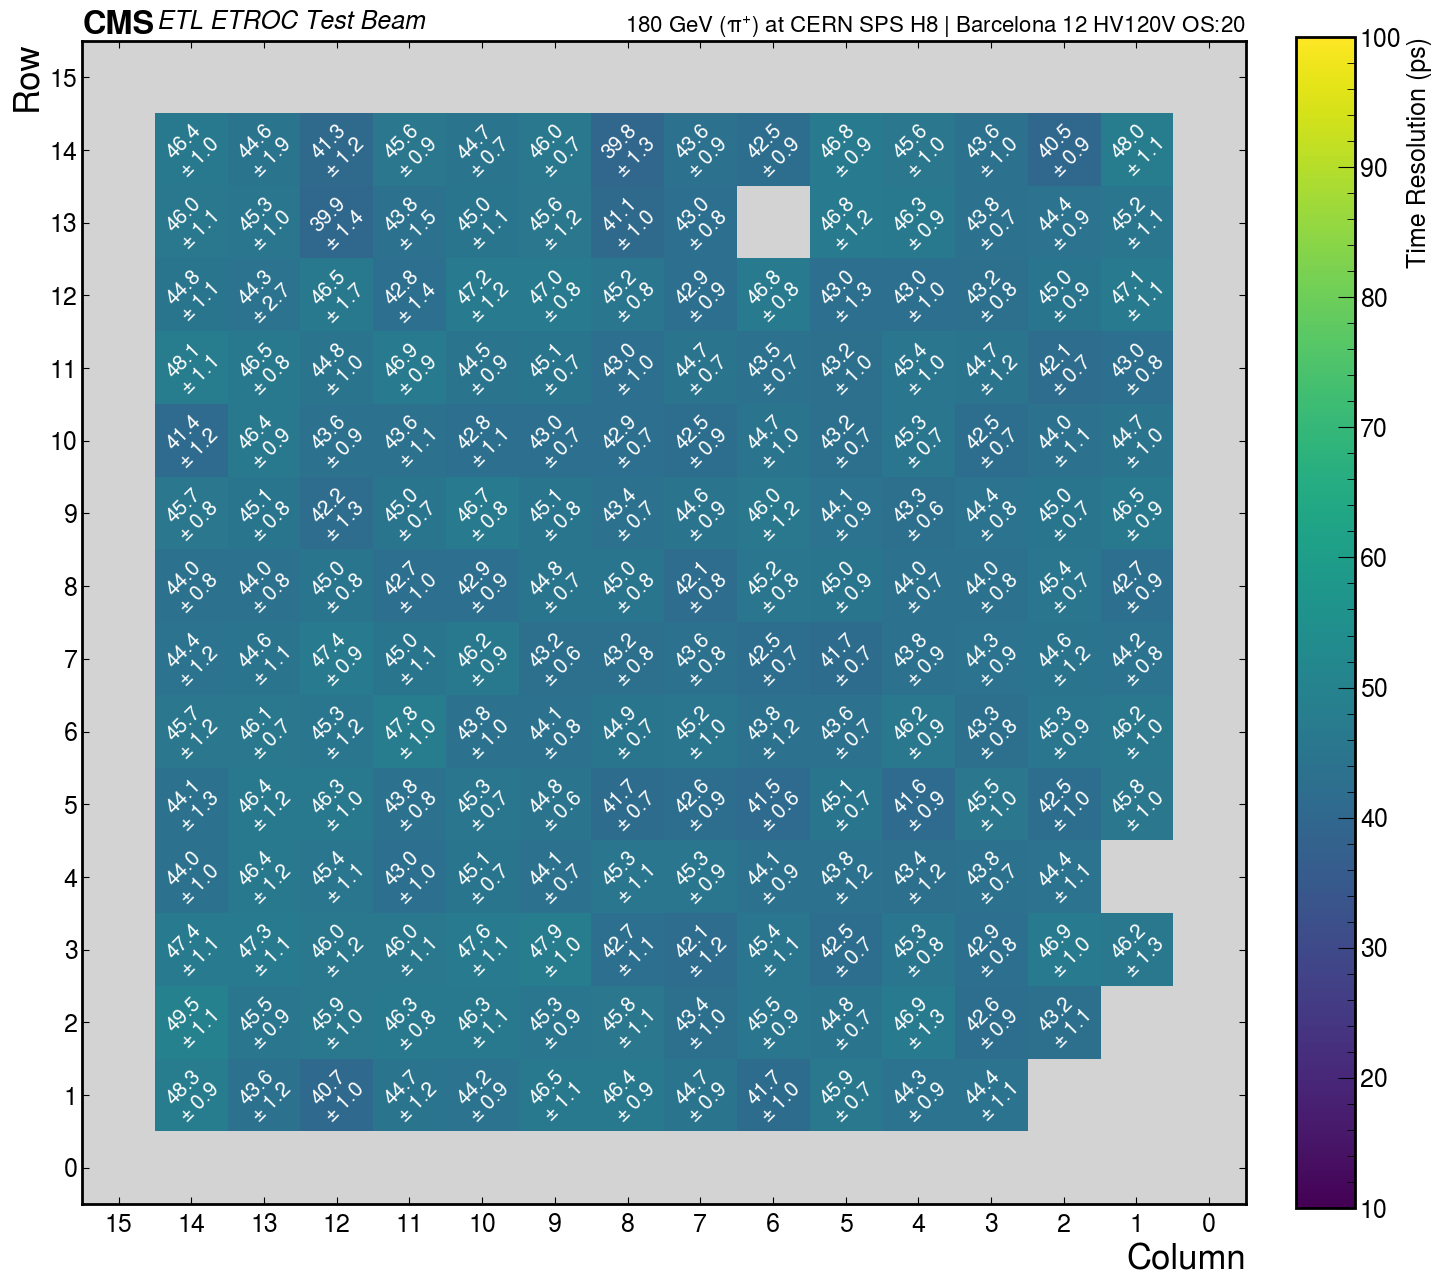

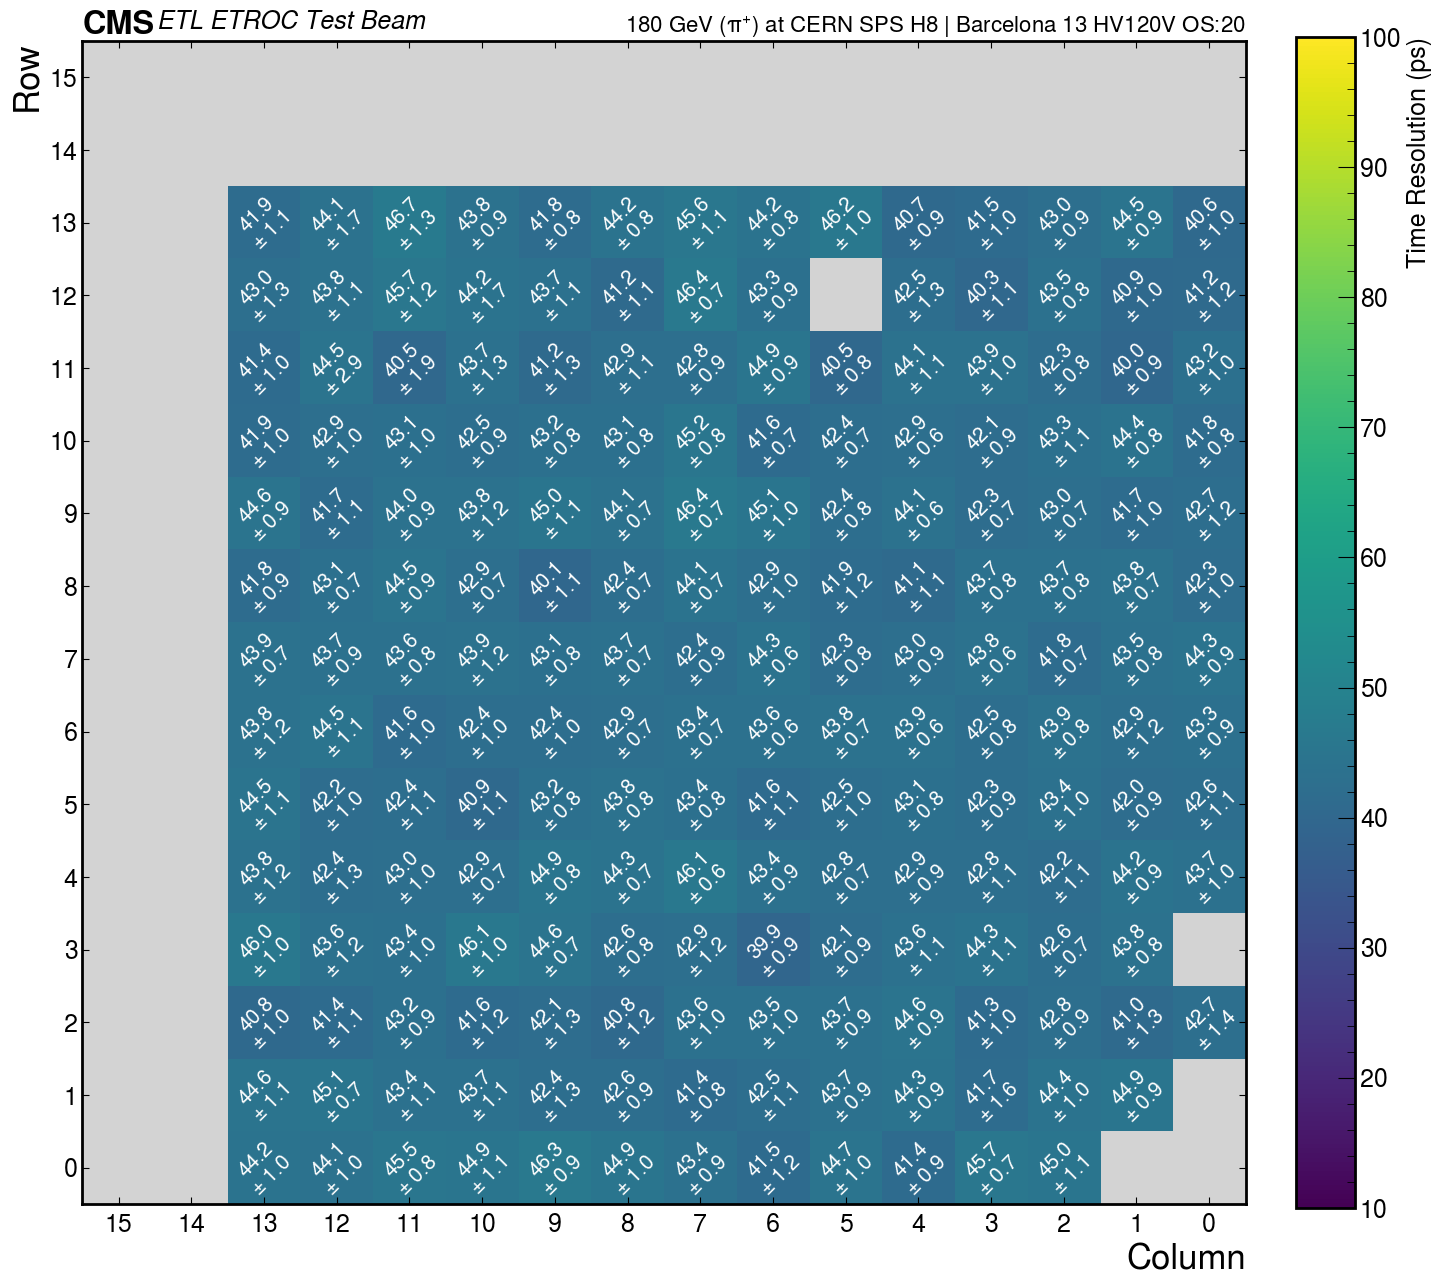

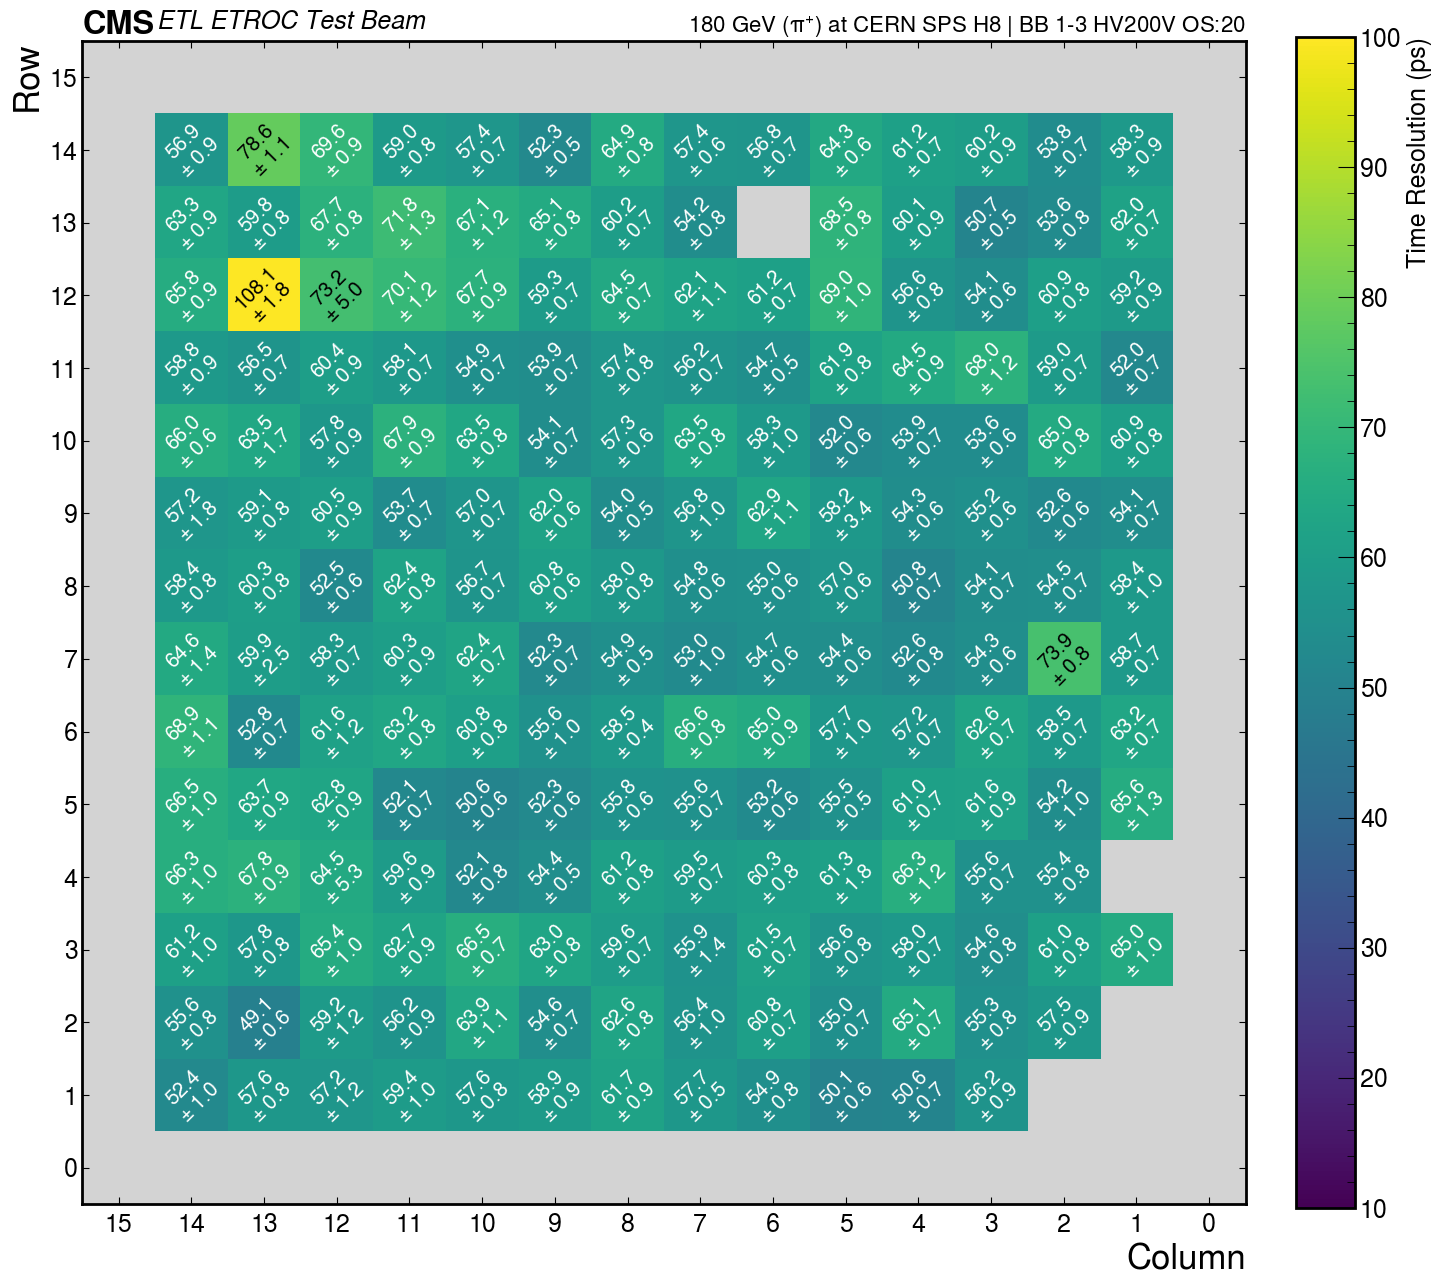

In [148]:
plot_resolution_table(input_df=selected_data, board_ids=board_to_analyze, tb_loc='cern_h8', fig_config=fig_configs,
                      min_resolution=10, max_resolution=100, slides_friendly = False, show_number=True)

/home/daq/ETROC2/ETROC-Analysis/TestBeam/beamtest_analysis_helper.py:2648: RuntimeWarning: divide by zero encountered in divide
  out = mod.fit(fit_vals, pars, x=fit_range, weights=1/np.sqrt(fit_vals))


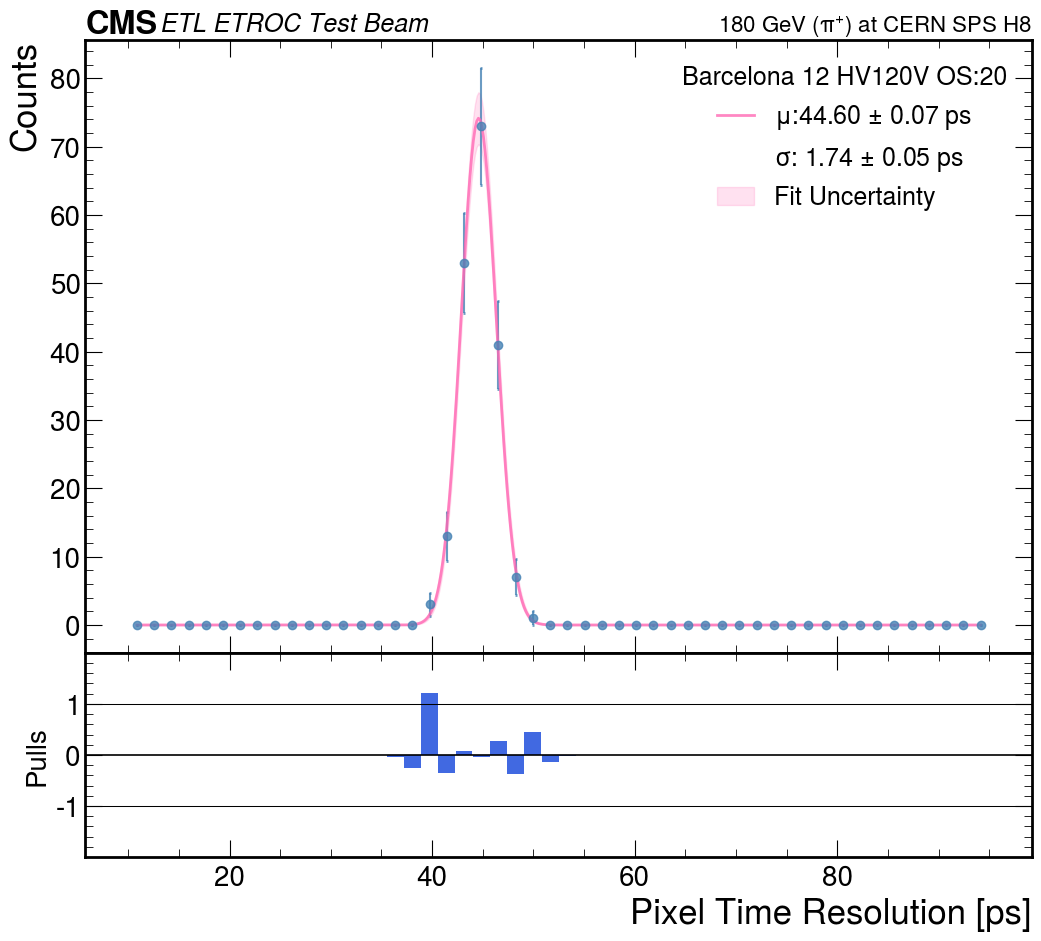

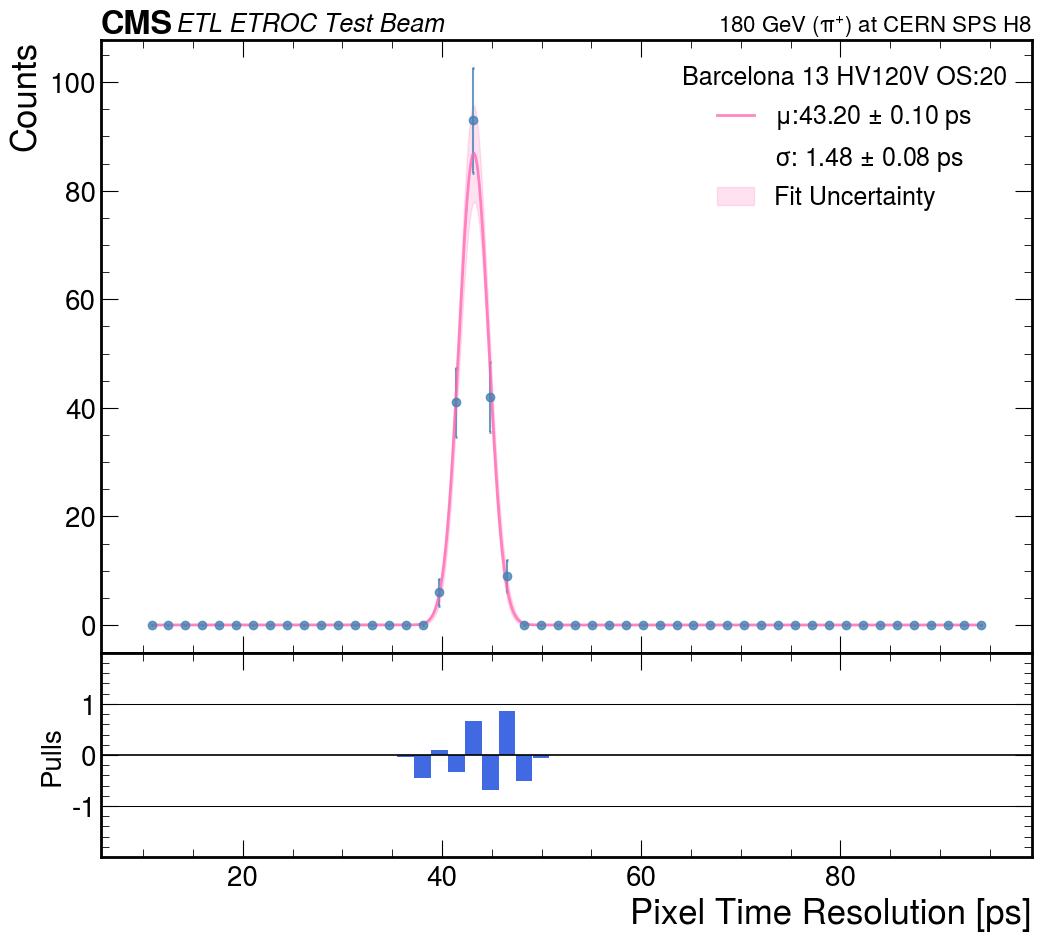

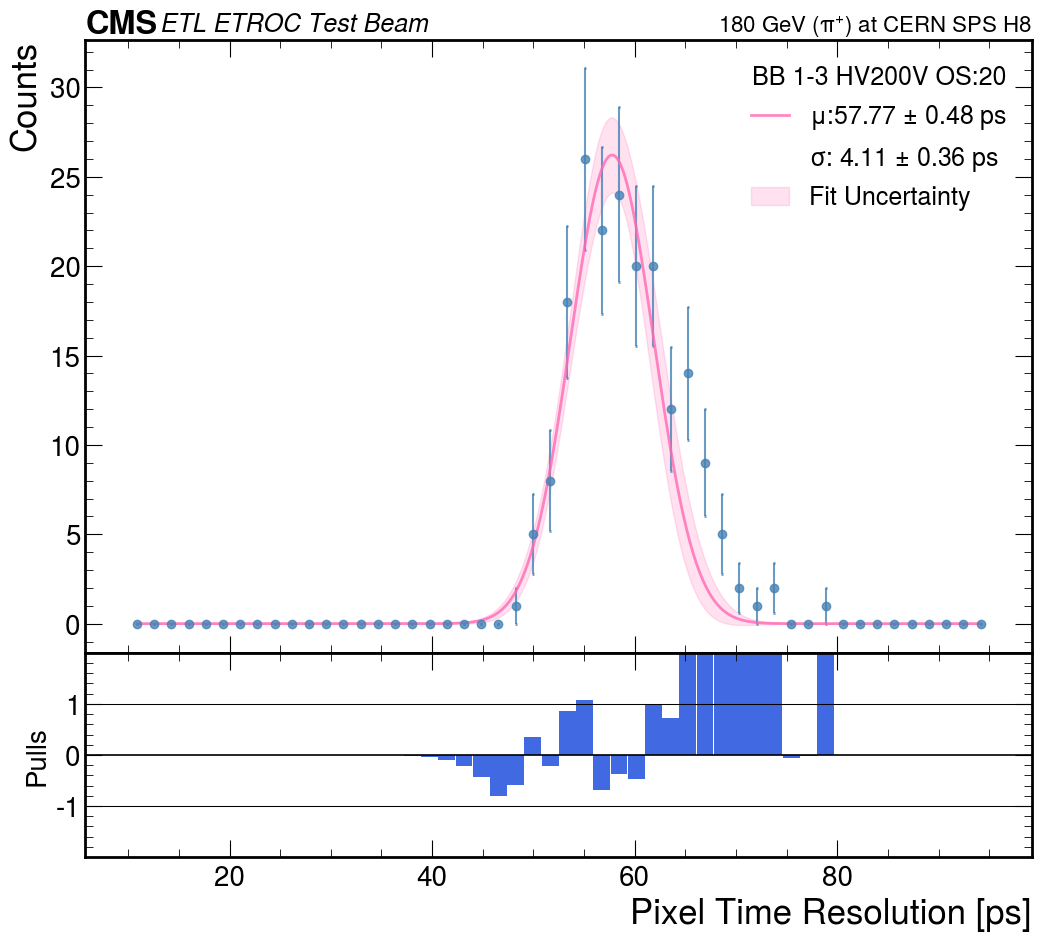

In [149]:
plot_resolution_with_pulls(input_df=selected_data, board_ids=board_to_analyze, board_names=chip_names, tb_loc='cern_h8',
                           fig_tag=chip_figtitles, hist_range=[10, 95], hist_bins=50, print_fit_results=False)

In [ ]:
plot_resolution_with_pulls(input_df=selected_data, board_ids=board_to_analyze, tb_loc='cern', fig_config=fig_configs,
                           hist_range=[10, 95], hist_bins=50, print_fit_results=False)